Dataset preview:
   Division   District  Division_Geocode  District_Geocode  Household_Total  \
0  Barishal    Barguna                10                 4           255390   
1    Khulna   Bagerhat                40                 1           408840   
2  Barishal   Barishal                10                 6           629626   
3  Barishal      Bhola                10                 9           449057   
4  Barishal  Jhalokati                10                42           162401   

   Population_Total  Household_Excluding_Slum_Floating  \
0           1010531                             254895   
1           1613076                             406058   
2           2570446                             620735   
3           1932518                             448944   
4            661160                             162212   

   Population_Excluding_Slum_Floating  Household_Slum  Population_Slum  ...  \
0                             1008695             451             1789  ...   
1

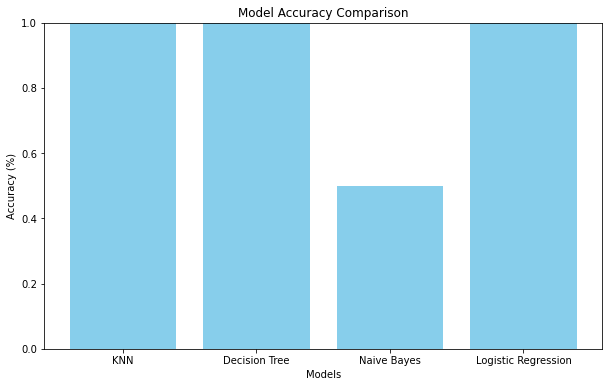


Precision, Recall, and F1-Score Comparison:
KNN -> Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Decision Tree -> Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Naive Bayes -> Precision: 1.00, Recall: 0.50, F1-Score: 0.67
Logistic Regression -> Precision: 1.00, Recall: 1.00, F1-Score: 1.00

Heatmaps for Confusion Matrices:


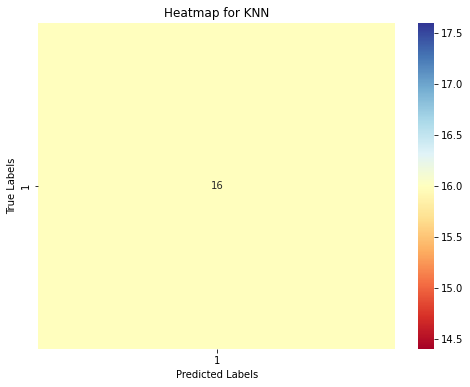

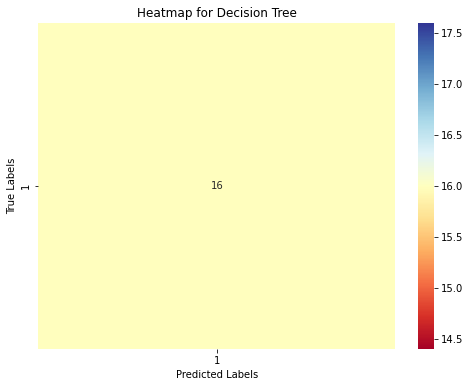

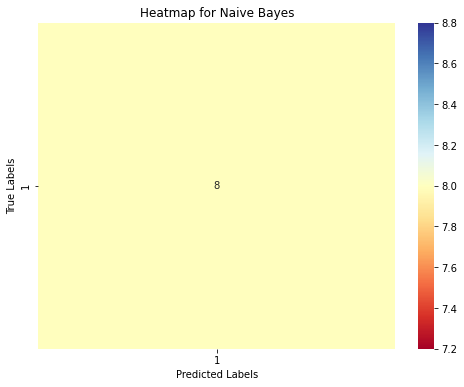

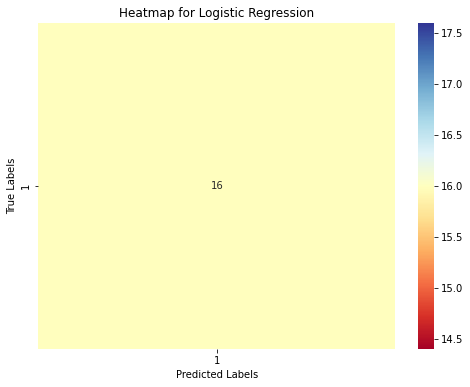

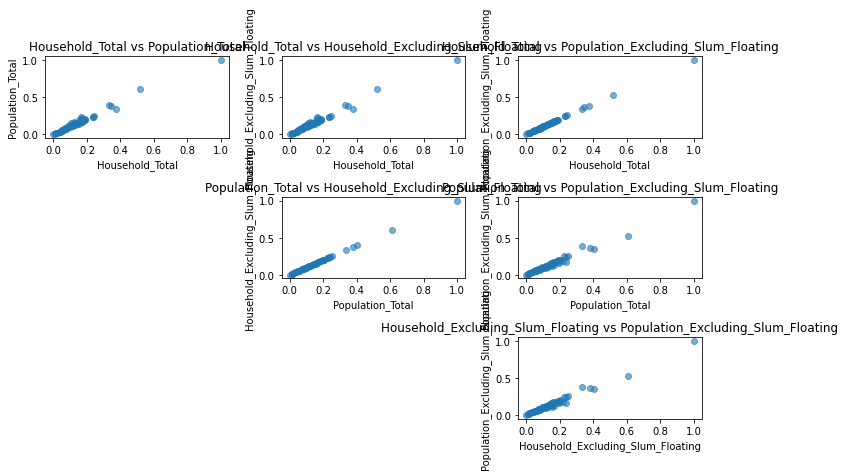

<function matplotlib.pyplot.show(close=None, block=None)>

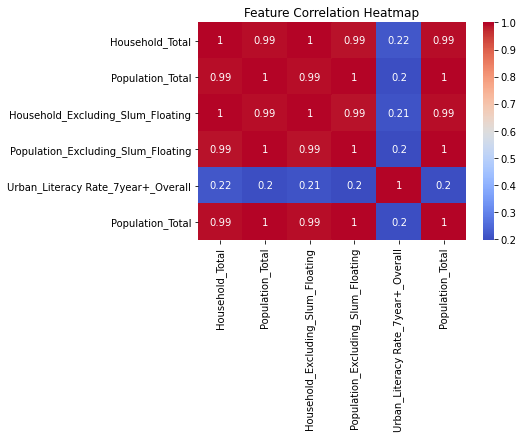

In [1]:
import os
import sys
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt

data_path = r'C:\Users\Muttaki\Downloads\bangladesh_bbs_population-and-housing-census-dataset_2022_admin-02.xlsx'
data = pd.read_excel(data_path)

print("Dataset preview:")
print(data.head())
print("\nTotal number of rows and columns in the dataset:", data.shape)

feature_columns = [
    'Household_Total',
    'Population_Total',
    'Household_Excluding_Slum_Floating',
    'Population_Excluding_Slum_Floating'
]
classification_column = 'Urban_Literacy Rate_7year+_Overall'
regression_label_column = 'Population_Total'

selected_data = data[feature_columns + [classification_column, regression_label_column]]
print("\nMissing values per column:")
print(selected_data.isnull().sum())
selected_data = selected_data.dropna()

features = selected_data[feature_columns]
classification_labels = (selected_data[classification_column] > 70).astype(int)
regression_labels = selected_data[regression_label_column]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    scaled_features, classification_labels, test_size=0.25, random_state=0
)

print("\nKNN Classifier:")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_clf, y_train_clf)
knn_predictions = knn.predict(X_test_clf)
knn_accuracy = accuracy_score(y_test_clf, knn_predictions)
print("KNN Accuracy: {:.2f}%".format(knn_accuracy * 100))

print("\nDecision Tree Classifier:")
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_clf, y_train_clf)
dt_predictions = dt.predict(X_test_clf)
dt_accuracy = accuracy_score(y_test_clf, dt_predictions)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))

print("\nNaive Bayes Classifier:")
nb = GaussianNB()
nb.fit(X_train_clf, y_train_clf)
nb_predictions = nb.predict(X_test_clf)
nb_accuracy = accuracy_score(y_test_clf, nb_predictions)
print("Naive Bayes Accuracy: {:.2f}%".format(nb_accuracy * 100))

print("\nLogistic Regression:")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)
log_reg_predictions = log_reg.predict(X_test_clf)
log_reg_accuracy = accuracy_score(y_test_clf, log_reg_predictions)
print("Logistic Regression Accuracy: {:.2f}%".format(log_reg_accuracy * 100))

models = ['KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression']
accuracies = [knn_accuracy, dt_accuracy, nb_accuracy, log_reg_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

print("\nPrecision, Recall, and F1-Score Comparison:")
for model_name, predictions in zip(models, [knn_predictions, dt_predictions, nb_predictions, log_reg_predictions]):
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_clf, predictions, average='binary')
    print(f"{model_name} -> Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

print("\nHeatmaps for Confusion Matrices:")
for model_name, predictions in zip(models, [knn_predictions, dt_predictions, nb_predictions, log_reg_predictions]):
    cm = confusion_matrix(y_test_clf, predictions, labels=np.unique(y_test_clf))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlBu", xticklabels=np.unique(y_test_clf), yticklabels=np.unique(y_test_clf))
    plt.title(f"Heatmap for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
 

plt.figure(figsize=(10, 6))
for i, col in enumerate(feature_columns):
    for j in range(i + 1, len(feature_columns)):
        plt.subplot(len(feature_columns)-1, len(feature_columns)-1, i * (len(feature_columns)-1) + j)
        plt.scatter(scaled_features[:, i], scaled_features[:, j], alpha=0.6)
        plt.xlabel(feature_columns[i])
        plt.ylabel(feature_columns[j])
        plt.title(f"{feature_columns[i]} vs {feature_columns[j]}")

plt.tight_layout()
plt.show()

import seaborn as sns
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show